In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [90]:
df1 = pd.read_csv('User_product_purchase_details_p2.csv')
df1[:2]

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200


In [91]:
df2 = pd.read_csv('user_demographics.csv')
df2[:2]

,User_ID,Gender,Age,Occupation
0,1000001,F,0-17,10
1,1000002,M,55+,16


In [92]:
# Merge on User_ID
df = pd.merge(df1, df2, on="User_ID", how="left")

In [93]:
# Create binary target
df["High_Value_Purchase"] = (df["Purchase"] >= 10000).astype(int)

In [94]:
df[:2]

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation,High_Value_Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370,F,0-17,10,0
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200,F,0-17,10,1


In [95]:
df.shape

(550068, 13)

In [96]:
round(df.describe(),2).T 

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1003028.84,1727.59,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Marital_Status,550068.0,0.41,0.49,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.40,3.94,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.84,5.09,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,12.67,4.13,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9263.97,5023.07,12.0,5823.0,8047.0,12054.0,23961.0
Occupation,550068.0,8.08,6.52,0.0,2.0,7.0,14.0,20.0
High_Value_Purchase,550068.0,0.34,0.48,0.0,0.0,0.0,1.0,1.0


In [97]:
df.drop(['User_ID','Product_ID'], axis=1,inplace=True)

In [98]:
df.drop(['Purchase'], axis=1,inplace=True)

In [99]:
df.columns

Index(['City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Gender', 'Age', 'Occupation', 'High_Value_Purchase'],
      dtype='object')

In [100]:
df['Product_Category_3'].isna().value_counts()

Product_Category_3
True     383247
False    166821
Name: count, dtype: int64

In [101]:
df['Product_Category_2'].isna().value_counts()

Product_Category_2
False    376430
True     173638
Name: count, dtype: int64

In [102]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [103]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [104]:
# Replace missing
df = df.fillna(0)

In [105]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [106]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [107]:
df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [108]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [109]:
# Dummy Variables - 
categorical_cols = ["City_Category", "Stay_In_Current_City_Years", 
                    "Marital_Status", "Gender", "Age"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [110]:
df.columns

Index(['Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Occupation', 'High_Value_Purchase', 'City_Category_B',
       'City_Category_C', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Marital_Status_1', 'Gender_M',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+'],
      dtype='object')

In [111]:
x = df
y = df['High_Value_Purchase']
x.drop(['High_Value_Purchase'], axis=1,inplace=True)

In [112]:
x[:2]

,Product_Category_1,Product_Category_2,Product_Category_3,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_1,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,3,0.0,0.0,10,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,1,6.0,14.0,10,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [116]:
y.value_counts()

High_Value_Purchase
0    360529
1    189539
Name: count, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 2)

y_train = y_train.values
y_test = y_test.values

In [114]:
# Here we scale the data for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [117]:
from sklearn.linear_model import LogisticRegression
glm = LogisticRegression(max_iter=2000,solver="liblinear")

In [119]:
lrmodel = glm.fit(x_train_scaled,y_train)
lr_pred= lrmodel.predict(x_test_scaled)

In [121]:
pd.crosstab(y_test,lr_pred)

col_0,0,1
row_0,,
0,64644,7397
1,18282,19691


In [122]:
lrmodel.predict_proba(x_test_scaled[:1])

array([[0.52912989, 0.47087011]])

AUC Score: 0.7772938387741397


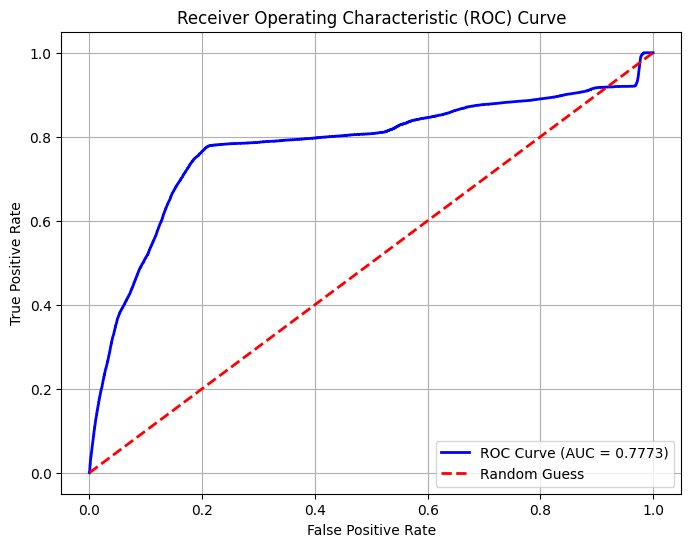

In [123]:
# ROC Curve - Reciever Operating Characteristic curve
#   trade off between true positive and false positive
#   area under the curve = prediction of model correctness


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_prob = lrmodel.predict_proba(x_test_scaled)[:, 1]

# Compute False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

print("LR Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

LR Accuracy: 0.7665842529132656
Precision: 0.7269270525694034
Confusion Matrix:
 [[64644  7397]
 [18282 19691]]


In [127]:
# Keras - Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History
from tensorflow.keras.metrics import Precision

In [129]:
# Build the ANN model
model = Sequential()

model.add(Dense(6, activation='relu',kernel_initializer='uniform',input_shape=(x_train_scaled.shape[1],)))  # First hidden layer
model.add(Dense(6, activation='relu',kernel_initializer = 'uniform'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid', kernel_initializer = 'uniform'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Precision()])


c:\Users\User\Documents\ML-Foundation\.MlEnv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [131]:
# Train the model and capture the training history
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3855 - precision: 0.7404 - val_loss: 0.3895 - val_precision: 0.7380
Epoch 2/100
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3834 - precision: 0.7414 - val_loss: 0.3883 - val_precision: 0.7385
Epoch 3/100
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3826 - precision: 0.7412 - val_loss: 0.3879 - val_precision: 0.7386
Epoch 4/100
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3824 - precision: 0.7418 - val_loss: 0.3873 - val_precision: 0.7365
Epoch 5/100
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 3s 939us/step - loss: 0.3823 - precision: 0.7419 - val_loss: 0.3871 - val_precision: 0.7393
Epoch 6/100
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3809 - precision: 0.7521 - val_loss: 0.3820 - val_precision: 0.7678
Epoch 7/100
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 3s 987us/step - loss: 0.3737 - precision: 0.7663 - val_loss: 0.3742 - val_precision: 0.7641
Epoch 8/100
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.

In [132]:
print(history.history.keys())

dict_keys(['loss', 'precision', 'val_loss', 'val_precision'])


In [133]:
# Make predictions on the test set
predictions = model.predict(x_test_scaled)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

pd.crosstab(y_test, predictions.reshape(1,-1))
x_test_scaled.shape

3438/3438 ━━━━━━━━━━━━━━━━━━━━ 2s 505us/step


(110014, 18)

In [137]:
y_test.shape

(110014,)

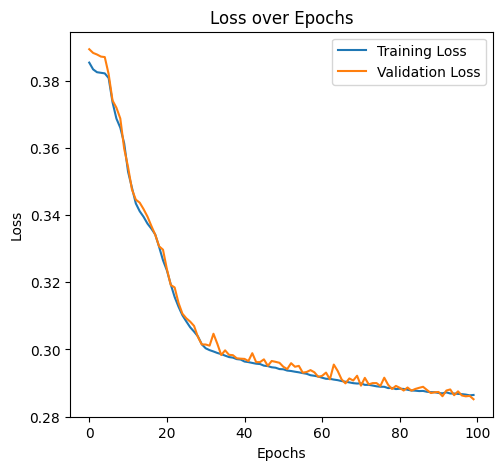

In [138]:
# Plot the training and validation loss
plt.figure(figsize=(12, 5))

# Plot for Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

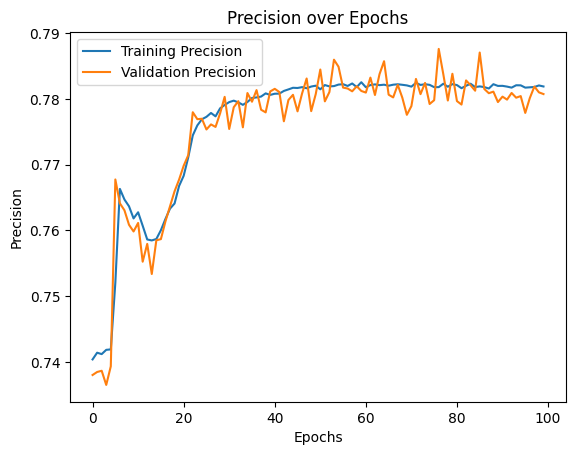

In [135]:
# Plot for Accuracy
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

print("NN Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

NN Accuracy: 0.886950751722508
Precision: 0.780184331797235
Confusion Matrix:
 [[62024 10017]
 [ 2420 35553]]
